In [0]:
#-----------------
# SONU GIRI
# BATCH 7
# sonu@arista.com
#-----------------

!pip install -q keras

In [2]:
import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
# this part will prevent tensorflow to allocate all the available GPU Memory
# backend
import tensorflow as tf
from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

In [4]:
# Load CIFAR10 Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_height, img_width, channel = x_train.shape[1], x_train.shape[2], x_train.shape[3]
print( x_train.shape )

170500096/170498071 [==============================] - 36s 0us/step
(50000, 32, 32, 3)


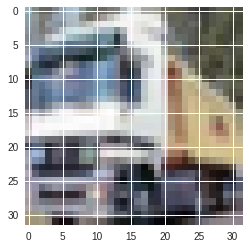

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow( x_train[1] )

In [0]:
# convert to one hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# Normalize input Data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [0]:
# Dense Block
def add_denseblock( input, num_filter, dropout_rate ):
    temp = input
    for _ in range( l ):
        BatchNorm = BatchNormalization()(temp)
        relu = Activation('relu')(BatchNorm)
        Conv2D_3_3 = Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(relu)
        if dropout_rate > 0:
          Conv2D_3_3 = Dropout(dropout_rate)(Conv2D_3_3)
        concat = Concatenate(axis=-1)([temp,Conv2D_3_3])
        temp = concat        
    return temp

In [0]:
def add_transition(input, num_filter, dropout_rate):
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = Conv2D(num_filter, (1,1), use_bias=False ,padding='same')(relu)
    if dropout_rate > 0:
      Conv2D_BottleNeck = Dropout(dropout_rate)(Conv2D_BottleNeck)
    avg = AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)    
    return avg

In [0]:
def output_layer(input):
    BatchNorm = BatchNormalization()(input)
    relu = Activation('relu')(BatchNorm)
    AvgPooling = AveragePooling2D(pool_size=(2,2))(relu)
    flat = Flatten()(AvgPooling)
    output = Dense(num_classes, activation='softmax')(flat)    
    return output

In [0]:
# Hyper parameters
num_filter = 24
dropout_rate = 0.15
l = 10

input = Input(shape=(img_height, img_width, channel,))
First_Conv2D = Conv2D(num_filter, (3,3), use_bias=False, padding='same')(input)

First_Block = add_denseblock(First_Conv2D, num_filter, dropout_rate)
First_Transition = add_transition(First_Block, num_filter, dropout_rate)

Second_Block = add_denseblock(First_Transition, num_filter, dropout_rate)
Second_Transition = add_transition(Second_Block, num_filter, dropout_rate)

Third_Block = add_denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = add_transition(Third_Block, num_filter, dropout_rate)

Last_Block = add_denseblock(Third_Transition,  num_filter, dropout_rate)
output = output_layer(Last_Block)

In [12]:
model = Model(inputs=[input], outputs=[output])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 24)   648         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 24)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 24)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
# Save the checkpoint in the /output folder
filepath = "best_only.hdf5"

# Keep only a single checkpoint, the best over test accuracy.
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

In [0]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [15]:
epochs = 50
batch_size = 32
steps = 50

model.fit( x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test),
           callbacks=[checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
21856/50000 [============>.................] - ETA: 4:03 - loss: 1.6249 - acc: 0.4051

50000/50000 [==============================] - 442s 9ms/step - loss: 1.3687 - acc: 0.5033 - val_loss: 1.3071 - val_acc: 0.5712

Epoch 00001: val_acc improved from -inf to 0.57120, saving model to best_only.hdf5
Epoch 2/50
 2592/50000 [>.............................] - ETA: 6:32 - loss: 1.0217 - acc: 0.6300

49984/50000 [============================>.] - ETA: 0s - loss: 0.9070 - acc: 0.6793

50000/50000 [==============================] - 432s 9ms/step - loss: 0.9069 - acc: 0.6794 - val_loss: 1.2333 - val_acc: 0.6493

Epoch 00002: val_acc improved from 0.57120 to 0.64930, saving model to best_only.hdf5
Epoch 3/50
 8032/50000 [===>..........................] - ETA: 5:43 - loss: 0.7648 - acc: 0.7290

49984/50000 [============================>.] - ETA: 0s - loss: 0.7315 - acc: 0.7436

50000/50000 [==============================] - 433s 9ms/step - loss: 0.7315 - acc: 0.7437 - val_loss: 0.8940 - val_acc: 0.7094

Epoch 00003: val_acc improved from 0.64930 to 0.70940, saving model to best_only.hdf5
Epoch 4/50
 8032/50000 [===>..........................] - ETA: 5:46 - loss: 0.6581 - acc: 0.7688

49984/50000 [============================>.] - ETA: 0s - loss: 0.6315 - acc: 0.7799

50000/50000 [==============================] - 436s 9ms/step - loss: 0.6316 - acc: 0.7799 - val_loss: 0.8522 - val_acc: 0.7372

Epoch 00004: val_acc improved from 0.70940 to 0.73720, saving model to best_only.hdf5
Epoch 5/50
 8032/50000 [===>..........................] - ETA: 5:46 - loss: 0.5418 - acc: 0.8104

49984/50000 [============================>.] - ETA: 0s - loss: 0.5507 - acc: 0.8065

50000/50000 [==============================] - 436s 9ms/step - loss: 0.5507 - acc: 0.8065 - val_loss: 0.8006 - val_acc: 0.7573

Epoch 00005: val_acc improved from 0.73720 to 0.75730, saving model to best_only.hdf5
Epoch 6/50
 8032/50000 [===>..........................] - ETA: 5:45 - loss: 0.4988 - acc: 0.8266

49984/50000 [============================>.] - ETA: 0s - loss: 0.4975 - acc: 0.8257

50000/50000 [==============================] - 436s 9ms/step - loss: 0.4977 - acc: 0.8257 - val_loss: 0.9925 - val_acc: 0.7237

Epoch 00006: val_acc did not improve from 0.75730
Epoch 7/50
 8864/50000 [====>.........................] - ETA: 5:39 - loss: 0.4299 - acc: 0.8481

49984/50000 [============================>.] - ETA: 0s - loss: 0.4484 - acc: 0.8438

50000/50000 [==============================] - 436s 9ms/step - loss: 0.4484 - acc: 0.8438 - val_loss: 0.6113 - val_acc: 0.8014

Epoch 00007: val_acc improved from 0.75730 to 0.80140, saving model to best_only.hdf5
Epoch 8/50
 8032/50000 [===>..........................] - ETA: 5:46 - loss: 0.3894 - acc: 0.8665

49984/50000 [============================>.] - ETA: 0s - loss: 0.4084 - acc: 0.8583

50000/50000 [==============================] - 436s 9ms/step - loss: 0.4084 - acc: 0.8583 - val_loss: 0.6299 - val_acc: 0.8026

Epoch 00008: val_acc improved from 0.80140 to 0.80260, saving model to best_only.hdf5
Epoch 9/50
 8032/50000 [===>..........................] - ETA: 5:46 - loss: 0.3437 - acc: 0.8826

49984/50000 [============================>.] - ETA: 0s - loss: 0.3692 - acc: 0.8711

50000/50000 [==============================] - 436s 9ms/step - loss: 0.3692 - acc: 0.8712 - val_loss: 0.7121 - val_acc: 0.7945

Epoch 00009: val_acc did not improve from 0.80260
Epoch 10/50
 8864/50000 [====>.........................] - ETA: 5:38 - loss: 0.3305 - acc: 0.8870

49984/50000 [============================>.] - ETA: 0s - loss: 0.3442 - acc: 0.8809

50000/50000 [==============================] - 436s 9ms/step - loss: 0.3442 - acc: 0.8810 - val_loss: 0.7104 - val_acc: 0.7980

Epoch 00010: val_acc did not improve from 0.80260
Epoch 11/50
 8864/50000 [====>.........................] - ETA: 5:36 - loss: 0.3049 - acc: 0.8936

49984/50000 [============================>.] - ETA: 0s - loss: 0.3174 - acc: 0.8895

50000/50000 [==============================] - 435s 9ms/step - loss: 0.3175 - acc: 0.8895 - val_loss: 0.4543 - val_acc: 0.8562

Epoch 00011: val_acc improved from 0.80260 to 0.85620, saving model to best_only.hdf5
Epoch 12/50
 8032/50000 [===>..........................] - ETA: 5:45 - loss: 0.2722 - acc: 0.9051

49984/50000 [============================>.] - ETA: 0s - loss: 0.2940 - acc: 0.8965

50000/50000 [==============================] - 435s 9ms/step - loss: 0.2941 - acc: 0.8964 - val_loss: 0.5075 - val_acc: 0.8421

Epoch 00012: val_acc did not improve from 0.85620
Epoch 13/50
 8864/50000 [====>.........................] - ETA: 5:39 - loss: 0.2560 - acc: 0.9095

49984/50000 [============================>.] - ETA: 0s - loss: 0.2648 - acc: 0.9065

50000/50000 [==============================] - 435s 9ms/step - loss: 0.2649 - acc: 0.9064 - val_loss: 0.5776 - val_acc: 0.8347

Epoch 00013: val_acc did not improve from 0.85620
Epoch 14/50
 8864/50000 [====>.........................] - ETA: 5:39 - loss: 0.2242 - acc: 0.9208

49984/50000 [============================>.] - ETA: 0s - loss: 0.2492 - acc: 0.9120

50000/50000 [==============================] - 435s 9ms/step - loss: 0.2493 - acc: 0.9120 - val_loss: 0.5112 - val_acc: 0.8509

Epoch 00014: val_acc did not improve from 0.85620
Epoch 15/50
 8864/50000 [====>.........................] - ETA: 5:38 - loss: 0.2060 - acc: 0.9264

49984/50000 [============================>.] - ETA: 0s - loss: 0.2294 - acc: 0.9193

50000/50000 [==============================] - 436s 9ms/step - loss: 0.2294 - acc: 0.9193 - val_loss: 0.5951 - val_acc: 0.8399

Epoch 00015: val_acc did not improve from 0.85620
Epoch 16/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.1856 - acc: 0.9340

49984/50000 [============================>.] - ETA: 0s - loss: 0.2168 - acc: 0.9230

50000/50000 [==============================] - 437s 9ms/step - loss: 0.2169 - acc: 0.9230 - val_loss: 0.4637 - val_acc: 0.8692

Epoch 00016: val_acc improved from 0.85620 to 0.86920, saving model to best_only.hdf5
Epoch 17/50
 8032/50000 [===>..........................] - ETA: 5:47 - loss: 0.1846 - acc: 0.9359

49984/50000 [============================>.] - ETA: 0s - loss: 0.2004 - acc: 0.9287

50000/50000 [==============================] - 436s 9ms/step - loss: 0.2004 - acc: 0.9287 - val_loss: 0.5352 - val_acc: 0.8541

Epoch 00017: val_acc did not improve from 0.86920
Epoch 18/50
 8864/50000 [====>.........................] - ETA: 5:37 - loss: 0.1768 - acc: 0.9382

49984/50000 [============================>.] - ETA: 0s - loss: 0.1924 - acc: 0.9320

50000/50000 [==============================] - 436s 9ms/step - loss: 0.1924 - acc: 0.9320 - val_loss: 0.5847 - val_acc: 0.8478

Epoch 00018: val_acc did not improve from 0.86920
Epoch 19/50
 8864/50000 [====>.........................] - ETA: 5:39 - loss: 0.1621 - acc: 0.9402

49984/50000 [============================>.] - ETA: 0s - loss: 0.1751 - acc: 0.9375

50000/50000 [==============================] - 436s 9ms/step - loss: 0.1751 - acc: 0.9375 - val_loss: 0.5366 - val_acc: 0.8554

Epoch 00019: val_acc did not improve from 0.86920
Epoch 20/50
 8864/50000 [====>.........................] - ETA: 5:39 - loss: 0.1521 - acc: 0.9453

49984/50000 [============================>.] - ETA: 0s - loss: 0.1700 - acc: 0.9393

50000/50000 [==============================] - 436s 9ms/step - loss: 0.1699 - acc: 0.9393 - val_loss: 0.5011 - val_acc: 0.8613

Epoch 00020: val_acc did not improve from 0.86920
Epoch 21/50
 8864/50000 [====>.........................] - ETA: 5:39 - loss: 0.1363 - acc: 0.9549

49984/50000 [============================>.] - ETA: 0s - loss: 0.1540 - acc: 0.9457

50000/50000 [==============================] - 436s 9ms/step - loss: 0.1541 - acc: 0.9457 - val_loss: 0.7133 - val_acc: 0.8213

Epoch 00021: val_acc did not improve from 0.86920
Epoch 22/50
 8864/50000 [====>.........................] - ETA: 5:39 - loss: 0.1374 - acc: 0.9527

49984/50000 [============================>.] - ETA: 0s - loss: 0.1538 - acc: 0.9448

50000/50000 [==============================] - 437s 9ms/step - loss: 0.1537 - acc: 0.9448 - val_loss: 0.5308 - val_acc: 0.8599

Epoch 00022: val_acc did not improve from 0.86920
Epoch 23/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.1257 - acc: 0.9560

49984/50000 [============================>.] - ETA: 0s - loss: 0.1405 - acc: 0.9493

50000/50000 [==============================] - 435s 9ms/step - loss: 0.1405 - acc: 0.9493 - val_loss: 0.5126 - val_acc: 0.8669

Epoch 00023: val_acc did not improve from 0.86920
Epoch 24/50
 8864/50000 [====>.........................] - ETA: 5:38 - loss: 0.1185 - acc: 0.9593

49984/50000 [============================>.] - ETA: 0s - loss: 0.1322 - acc: 0.9529

50000/50000 [==============================] - 434s 9ms/step - loss: 0.1322 - acc: 0.9529 - val_loss: 0.5155 - val_acc: 0.8674

Epoch 00024: val_acc did not improve from 0.86920
Epoch 25/50
 8864/50000 [====>.........................] - ETA: 5:37 - loss: 0.1145 - acc: 0.9614

49984/50000 [============================>.] - ETA: 0s - loss: 0.1294 - acc: 0.9542

50000/50000 [==============================] - 434s 9ms/step - loss: 0.1294 - acc: 0.9542 - val_loss: 0.4929 - val_acc: 0.8706

Epoch 00025: val_acc improved from 0.86920 to 0.87060, saving model to best_only.hdf5
Epoch 26/50
 8032/50000 [===>..........................] - ETA: 5:42 - loss: 0.0991 - acc: 0.9638

49984/50000 [============================>.] - ETA: 0s - loss: 0.1218 - acc: 0.9572

50000/50000 [==============================] - 433s 9ms/step - loss: 0.1219 - acc: 0.9571 - val_loss: 0.5307 - val_acc: 0.8668

Epoch 00026: val_acc did not improve from 0.87060
Epoch 27/50
 8864/50000 [====>.........................] - ETA: 5:38 - loss: 0.1122 - acc: 0.9612

49984/50000 [============================>.] - ETA: 0s - loss: 0.1156 - acc: 0.9582

50000/50000 [==============================] - 434s 9ms/step - loss: 0.1156 - acc: 0.9582 - val_loss: 0.5005 - val_acc: 0.8761

Epoch 00027: val_acc improved from 0.87060 to 0.87610, saving model to best_only.hdf5
Epoch 28/50
 8032/50000 [===>..........................] - ETA: 5:44 - loss: 0.0922 - acc: 0.9680

49984/50000 [============================>.] - ETA: 0s - loss: 0.1140 - acc: 0.9592

50000/50000 [==============================] - 435s 9ms/step - loss: 0.1140 - acc: 0.9592 - val_loss: 0.6972 - val_acc: 0.8378

Epoch 00028: val_acc did not improve from 0.87610
Epoch 29/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.0816 - acc: 0.9727

49984/50000 [============================>.] - ETA: 0s - loss: 0.1036 - acc: 0.9638

50000/50000 [==============================] - 437s 9ms/step - loss: 0.1036 - acc: 0.9638 - val_loss: 0.5254 - val_acc: 0.8712

Epoch 00029: val_acc did not improve from 0.87610
Epoch 30/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.0903 - acc: 0.9667

49984/50000 [============================>.] - ETA: 0s - loss: 0.1072 - acc: 0.9613

50000/50000 [==============================] - 437s 9ms/step - loss: 0.1071 - acc: 0.9613 - val_loss: 0.5145 - val_acc: 0.8729

Epoch 00030: val_acc did not improve from 0.87610
Epoch 31/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.0930 - acc: 0.9667

49984/50000 [============================>.] - ETA: 0s - loss: 0.0970 - acc: 0.9655

50000/50000 [==============================] - 437s 9ms/step - loss: 0.0970 - acc: 0.9655 - val_loss: 0.6058 - val_acc: 0.8585

Epoch 00031: val_acc did not improve from 0.87610
Epoch 32/50
 8864/50000 [====>.........................] - ETA: 5:41 - loss: 0.0771 - acc: 0.9725

49984/50000 [============================>.] - ETA: 0s - loss: 0.0977 - acc: 0.9656

50000/50000 [==============================] - 437s 9ms/step - loss: 0.0977 - acc: 0.9656 - val_loss: 0.5154 - val_acc: 0.8786

Epoch 00032: val_acc improved from 0.87610 to 0.87860, saving model to best_only.hdf5
Epoch 33/50
 8032/50000 [===>..........................] - ETA: 5:47 - loss: 0.0811 - acc: 0.9704

49984/50000 [============================>.] - ETA: 0s - loss: 0.0925 - acc: 0.9667

50000/50000 [==============================] - 437s 9ms/step - loss: 0.0926 - acc: 0.9667 - val_loss: 0.5422 - val_acc: 0.8720

Epoch 00033: val_acc did not improve from 0.87860
Epoch 34/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.0736 - acc: 0.9745

49984/50000 [============================>.] - ETA: 0s - loss: 0.0894 - acc: 0.9681

50000/50000 [==============================] - 437s 9ms/step - loss: 0.0893 - acc: 0.9681 - val_loss: 0.5783 - val_acc: 0.8634

Epoch 00034: val_acc did not improve from 0.87860
Epoch 35/50
 8864/50000 [====>.........................] - ETA: 5:39 - loss: 0.0802 - acc: 0.9745

49984/50000 [============================>.] - ETA: 0s - loss: 0.0907 - acc: 0.9694

50000/50000 [==============================] - 437s 9ms/step - loss: 0.0907 - acc: 0.9694 - val_loss: 0.5883 - val_acc: 0.8707

Epoch 00035: val_acc did not improve from 0.87860
Epoch 36/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.0799 - acc: 0.9704

49984/50000 [============================>.] - ETA: 0s - loss: 0.0849 - acc: 0.9698

50000/50000 [==============================] - 437s 9ms/step - loss: 0.0850 - acc: 0.9697 - val_loss: 0.6675 - val_acc: 0.8584

Epoch 00036: val_acc did not improve from 0.87860
Epoch 37/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.0706 - acc: 0.9751

49984/50000 [============================>.] - ETA: 0s - loss: 0.0807 - acc: 0.9716

50000/50000 [==============================] - 437s 9ms/step - loss: 0.0806 - acc: 0.9716 - val_loss: 0.5228 - val_acc: 0.8799

Epoch 00037: val_acc improved from 0.87860 to 0.87990, saving model to best_only.hdf5
Epoch 38/50
 8032/50000 [===>..........................] - ETA: 5:47 - loss: 0.0697 - acc: 0.9753

49984/50000 [============================>.] - ETA: 0s - loss: 0.0849 - acc: 0.9693

50000/50000 [==============================] - 437s 9ms/step - loss: 0.0850 - acc: 0.9692 - val_loss: 0.5686 - val_acc: 0.8726

Epoch 00038: val_acc did not improve from 0.87990
Epoch 39/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.0738 - acc: 0.9739

49984/50000 [============================>.] - ETA: 0s - loss: 0.0778 - acc: 0.9721

50000/50000 [==============================] - 437s 9ms/step - loss: 0.0778 - acc: 0.9720 - val_loss: 0.5743 - val_acc: 0.8783

Epoch 00039: val_acc did not improve from 0.87990
Epoch 40/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.0732 - acc: 0.9752

49984/50000 [============================>.] - ETA: 0s - loss: 0.0772 - acc: 0.9732

50000/50000 [==============================] - 436s 9ms/step - loss: 0.0773 - acc: 0.9731 - val_loss: 0.5641 - val_acc: 0.8724

Epoch 00040: val_acc did not improve from 0.87990
Epoch 41/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.0629 - acc: 0.9769

49984/50000 [============================>.] - ETA: 0s - loss: 0.0746 - acc: 0.9730

50000/50000 [==============================] - 437s 9ms/step - loss: 0.0746 - acc: 0.9730 - val_loss: 0.5330 - val_acc: 0.8832

Epoch 00041: val_acc improved from 0.87990 to 0.88320, saving model to best_only.hdf5
Epoch 42/50
 8032/50000 [===>..........................] - ETA: 5:44 - loss: 0.0714 - acc: 0.9757

49984/50000 [============================>.] - ETA: 0s - loss: 0.0703 - acc: 0.9752

50000/50000 [==============================] - 435s 9ms/step - loss: 0.0702 - acc: 0.9752 - val_loss: 0.4931 - val_acc: 0.8869

Epoch 00042: val_acc improved from 0.88320 to 0.88690, saving model to best_only.hdf5
Epoch 43/50
 8032/50000 [===>..........................] - ETA: 5:48 - loss: 0.0739 - acc: 0.9736

49984/50000 [============================>.] - ETA: 0s - loss: 0.0746 - acc: 0.9728

50000/50000 [==============================] - 437s 9ms/step - loss: 0.0746 - acc: 0.9728 - val_loss: 0.5295 - val_acc: 0.8782

Epoch 00043: val_acc did not improve from 0.88690
Epoch 44/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.0593 - acc: 0.9797

49984/50000 [============================>.] - ETA: 0s - loss: 0.0680 - acc: 0.9758

50000/50000 [==============================] - 436s 9ms/step - loss: 0.0679 - acc: 0.9758 - val_loss: 0.5626 - val_acc: 0.8794

Epoch 00044: val_acc did not improve from 0.88690
Epoch 45/50
 8864/50000 [====>.........................] - ETA: 5:36 - loss: 0.0567 - acc: 0.9799

49984/50000 [============================>.] - ETA: 0s - loss: 0.0677 - acc: 0.9759

50000/50000 [==============================] - 436s 9ms/step - loss: 0.0677 - acc: 0.9759 - val_loss: 0.5466 - val_acc: 0.8806

Epoch 00045: val_acc did not improve from 0.88690
Epoch 46/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.0604 - acc: 0.9806

49984/50000 [============================>.] - ETA: 0s - loss: 0.0657 - acc: 0.9774

50000/50000 [==============================] - 437s 9ms/step - loss: 0.0658 - acc: 0.9773 - val_loss: 0.5867 - val_acc: 0.8738

Epoch 00046: val_acc did not improve from 0.88690
Epoch 47/50
 8864/50000 [====>.........................] - ETA: 5:39 - loss: 0.0572 - acc: 0.9789

49984/50000 [============================>.] - ETA: 0s - loss: 0.0645 - acc: 0.9766

50000/50000 [==============================] - 434s 9ms/step - loss: 0.0645 - acc: 0.9766 - val_loss: 0.5120 - val_acc: 0.8844

Epoch 00047: val_acc did not improve from 0.88690
Epoch 48/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.0589 - acc: 0.9796

49984/50000 [============================>.] - ETA: 0s - loss: 0.0622 - acc: 0.9781

50000/50000 [==============================] - 438s 9ms/step - loss: 0.0622 - acc: 0.9781 - val_loss: 0.5614 - val_acc: 0.8742

Epoch 00048: val_acc did not improve from 0.88690
Epoch 49/50
 8864/50000 [====>.........................] - ETA: 5:40 - loss: 0.0529 - acc: 0.9794

49984/50000 [============================>.] - ETA: 0s - loss: 0.0589 - acc: 0.9791

50000/50000 [==============================] - 438s 9ms/step - loss: 0.0589 - acc: 0.9791 - val_loss: 0.6099 - val_acc: 0.8747

Epoch 00049: val_acc did not improve from 0.88690
Epoch 50/50
 8864/50000 [====>.........................] - ETA: 5:41 - loss: 0.0564 - acc: 0.9799

49984/50000 [============================>.] - ETA: 0s - loss: 0.0608 - acc: 0.9787

50000/50000 [==============================] - 438s 9ms/step - loss: 0.0609 - acc: 0.9786 - val_loss: 0.5627 - val_acc: 0.8790

Epoch 00050: val_acc did not improve from 0.88690


In [0]:
model.load_weights(filepath)

In [17]:
# Test the model
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 25s 3ms/step
Test loss: 0.49307049863934516
Test accuracy: 0.8869


In [18]:
# Save the trained weights in to .h5 format
model.save_weights(filepath)
print("Saved model to disk")

Saved model to disk
